In [1]:
import sys
sys.path.append('../data/python_tj2_web_services')

In [2]:
import requests

getmagn_url = 'https://info.fusion.ciemat.es/cgi-bin/TJII_getmagn.cgi'
funct = 'flux_car'
config = '100_44_64'
x = 1.7
y = 0.0
z = 0.05

payload = [('funct', funct), ('config', config), ('x', x), ('y', y), ('z', z)]

# verify=False can be needed to skip problems with SSL certificates
# and then, it prints a warning message
result = requests.get(getmagn_url, params=payload, verify=False).json()

/Users/sofiamorenolasa/Desktop/TFG/.venv/lib/python3.10/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'info.fusion.ciemat.es'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


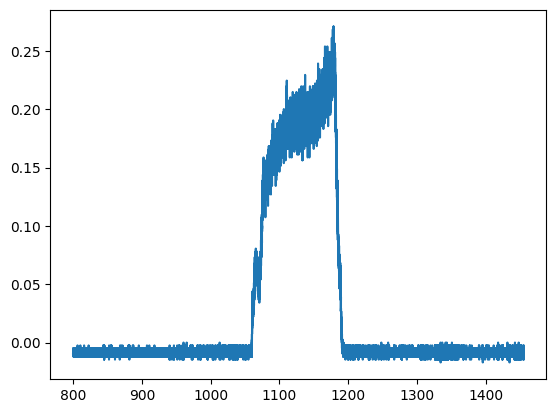

In [3]:
import tj2services
import matplotlib.pyplot as plt

r = tj2services.getdata(shot=50000, signal='ACTON275')

plt.plot(r['time'], r['data'])
plt.show()

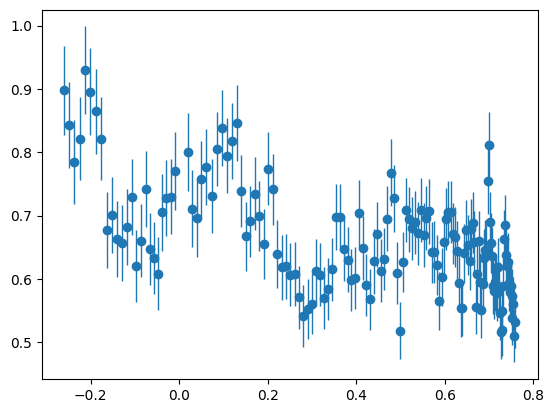

In [4]:
import tj2services
import matplotlib.pyplot as plt

# Retrieve profiles for the specified shot
r_rho = tj2services.getprof(shot=50000, signal='PerfilRho_')
r_ne = tj2services.getprof(shot=50000, signal='PerfilNe_')
r_dne = tj2services.getprof(shot=50000, signal='PerfildNe_')

# Extract data for plotting
x = r_rho['prof']
y = r_ne['prof']
yerr = r_dne['prof']

# Plot the data with error bars
plt.errorbar(x, y, yerr=yerr, marker='o', lw=0, elinewidth=1)
plt.show()

In [5]:
import tj2services

# First query
r1 = tj2services.getrdb_shots(variables='CONFIGURACION', shots=49999)
print('First query:')
print(r1['info'])
print()

# Second query
r2 = tj2services.getrdb_shots(variables=['NDES', 'CONFIGURACION'], shots=(50000, 50002))
print('Second query:')
print(r2['info'])

First query:
[{'CONFIGURACION': '082_061_063'}]

Second query:
[{'NDES': 50000, 'CONFIGURACION': '082_061_063'}, {'NDES': 50001, 'CONFIGURACION': '082_061_063'}, {'NDES': 50002, 'CONFIGURACION': '082_061_063'}]


In [6]:
import tj2services

# Compute the flux
r = tj2services.flux_car(config='100_44_64', x=1.7, y=0, z=0.05)

# Print the result
print(f"Value of the flux for (x={r['x']}, y={r['y']}, z={r['z']}): {r['psi']}")

Value of the flux for (x=1.7, y=0.0, z=0.050000001): 0.097419985
